G2M: Cab Industry
Week 2

Business Problem:
US cab company is majory of two kinds; Pink Cab and Yellow Cab. Our problem is to find out which Cab company would be good choice to invest in. For this purpose, we should find the advantages(profits) of that car compared to another one. Whichever cab company seems suitable in terms on market value, we would invest in that.

Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

Loading Dataset

In [5]:
df_cab = pd.read_csv('Dataset/Cab_Data.csv')
df_city = pd.read_csv('Dataset/City.csv')
df_cust = pd.read_csv('Dataset/Customer_ID.csv')
df_tran = pd.read_csv('Dataset/Transaction_ID.csv')

General Picture

In [6]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [8]:
check_df(df_cab)

##################### Shape #####################
(359392, 7)
##################### Types #####################
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object
##################### Head #####################
   Transaction ID  Date of Travel   Company        City  KM Travelled  Price Charged  Cost of Trip
0        10000011           42377  Pink Cab  ATLANTA GA        30.450        370.950       313.635
1        10000012           42375  Pink Cab  ATLANTA GA        28.620        358.520       334.854
2        10000013           42371  Pink Cab  ATLANTA GA         9.040        125.200        97.632
##################### Tail #####################
        Transaction ID  Date of Travel     Company           City  KM Travelled  Price Charged  Cost of Trip
359389        10440105           43105  Yellow Cab  WASHINGTON DC        27.750        43

In [9]:
check_df(df_city)

##################### Shape #####################
(20, 3)
##################### Types #####################
City          object
Population    object
Users         object
dtype: object
##################### Head #####################
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
##################### Tail #####################
             City Population      Users
17  WASHINGTON DC   418,859    127,001 
18   NASHVILLE TN   327,225      9,270 
19      BOSTON MA   248,968     80,021 
##################### NA #####################
City          0
Population    0
Users         0
dtype: int64
##################### Quantiles #####################
Empty DataFrame
Columns: [0.0, 0.05, 0.5, 0.95, 0.99, 1.0]
Index: []


In [10]:
check_df(df_cust)

##################### Shape #####################
(49171, 4)
##################### Types #####################
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object
##################### Head #####################
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
##################### Tail #####################
       Customer ID  Gender  Age  Income (USD/Month)
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128
##################### NA #####################
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
##################### Quantiles #####################
                      0.000    0.050     0.500     0.95

In [11]:
check_df(df_tran)

##################### Shape #####################
(440098, 3)
##################### Types #####################
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object
##################### Head #####################
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
##################### Tail #####################
        Transaction ID  Customer ID Payment_Mode
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card
##################### NA #####################
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
##################### Quantiles #####################
                      0.000        0.050        0.500        0.950        0.990        1.000
Transaction ID 10000011.000 10022015.850 10220059.500 10418103

Identifying the numerical and categorical variables

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

## Notes ##
# cat_but_ car: categorical but actually cardinal
# num_but_cat: numerical but actually categorical

In [13]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_cab)

Observations: 359392
Variables: 7
cat_cols: 2
num_cols: 5
cat_but_car: 0
num_but_cat: 0


In [14]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_city)

Observations: 20
Variables: 3
cat_cols: 3
num_cols: 0
cat_but_car: 0
num_but_cat: 0


In [15]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_cust)

Observations: 49171
Variables: 4
cat_cols: 1
num_cols: 3
cat_but_car: 0
num_but_cat: 0


In [16]:
cat_cols, cat_but_car, num_cols = grab_col_names(df_tran)

Observations: 440098
Variables: 3
cat_cols: 1
num_cols: 2
cat_but_car: 0
num_but_cat: 0


Handle the Travelling Date

In [17]:
from datetime import datetime

min_date = df_cab['Date of Travel'].min()
max_date = df_cab['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + min_date - 2).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + max_date - 2).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

31-01-2016
29-01-2019


In [18]:
def handle_date(date):
    convert = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")

In [19]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda x: handle_date(x))

In [22]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.450,370.950,313.635
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.620,358.520,334.854
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.040,125.200,97.632
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.170,377.400,351.602
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.730,114.620,97.776


Change DataType

In [29]:
# 'Population' must be Int
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Population'] = df_city['Population'].astype(float)

# 'Users' must be Int
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Users'] = df_city['Users'].astype(float)

In [30]:
df_city.dtypes

City           object
Population    float64
Users         float64
dtype: object

Merge dataset

In [35]:
df= df_cab.merge(df_tran, on= 'Transaction ID').merge(df_cust, on ='Customer ID').merge(df_city, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.450,370.950,313.635,29290,Card,Male,28,10813,814885.000,24701.000
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.190,598.700,317.423,29290,Cash,Male,28,10813,814885.000,24701.000
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.550,792.050,597.402,29290,Card,Male,28,10813,814885.000,24701.000
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.620,358.520,334.854,27703,Card,Male,27,9237,814885.000,24701.000
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.380,721.100,467.119,27703,Card,Male,27,9237,814885.000,24701.000


In [67]:
check_df(df)

##################### Shape #####################
(359392, 14)
##################### Types #####################
Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object
##################### Head #####################
   Transaction ID Date of Travel     Company        City  KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  Population     Users
0        10000011     2016-02-06    Pink Cab  ATLANTA GA        30.450        370.950       313.635        29290         Card 

Analysis of Correlation

In [62]:
corr = df.corr()
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000,-0.001,-0.053,-0.003,-0.017,-0.001,-0.002,0.024,0.014
KM Travelled,-0.001,1.000,0.836,0.982,0.000,-0.000,-0.001,-0.002,-0.000
Price Charged,-0.053,0.836,1.000,0.860,-0.177,-0.003,0.003,0.327,0.281
Cost of Trip,-0.003,0.982,0.860,1.000,0.003,-0.000,-0.001,0.015,0.024
Customer ID,-0.017,0.000,-0.177,0.003,1.000,-0.005,-0.014,-0.647,-0.611
Age,-0.001,-0.000,-0.003,-0.000,-0.005,1.000,0.004,-0.009,-0.006
Income (USD/Month),-0.002,-0.001,0.003,-0.001,-0.014,0.004,1.000,0.012,0.010
Population,0.024,-0.002,0.327,0.015,-0.647,-0.009,0.012,1.000,0.915
Users,0.014,-0.000,0.281,0.024,-0.611,-0.006,0.010,0.915,1.000


In [64]:
import seaborn as sb

/var/folders/_l/zn3yx95540b4767_3yg5g2fh0000gn/T/ipykernel_96079/3385898477.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


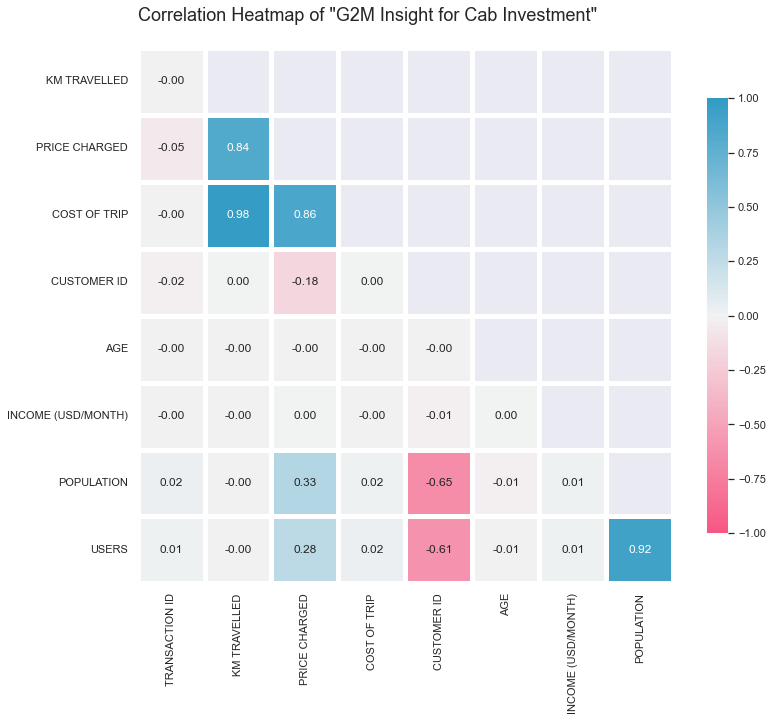

In [65]:
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)

sb.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           linewidths=5, cmap=cmap, vmin=-1, vmax=1,
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

title = 'Correlation Heatmap of "G2M Insight for Cab Investment"\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

In conclusion, the relationship between the different fields in the dataset is evident. The heatmap indicates a strong connection between the distance traveled (KM Travelled), the cost of the trip, and the price charged. The distance traveled does not seem to be affected by the age or income of the customer.

Furthermore, there is a clear correlation between the population and the number of users, which is to be expected.

Visualizing

1. User Travel

In [85]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

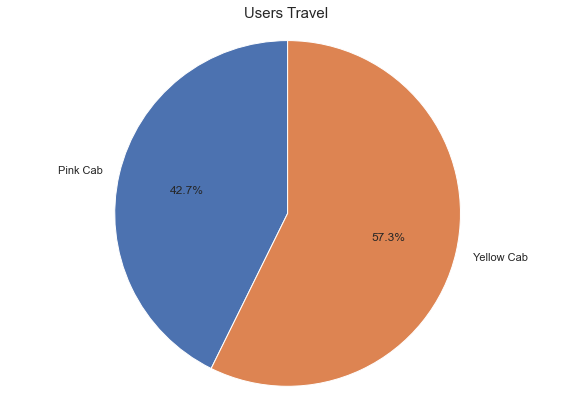

In [148]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

2. Payment Type

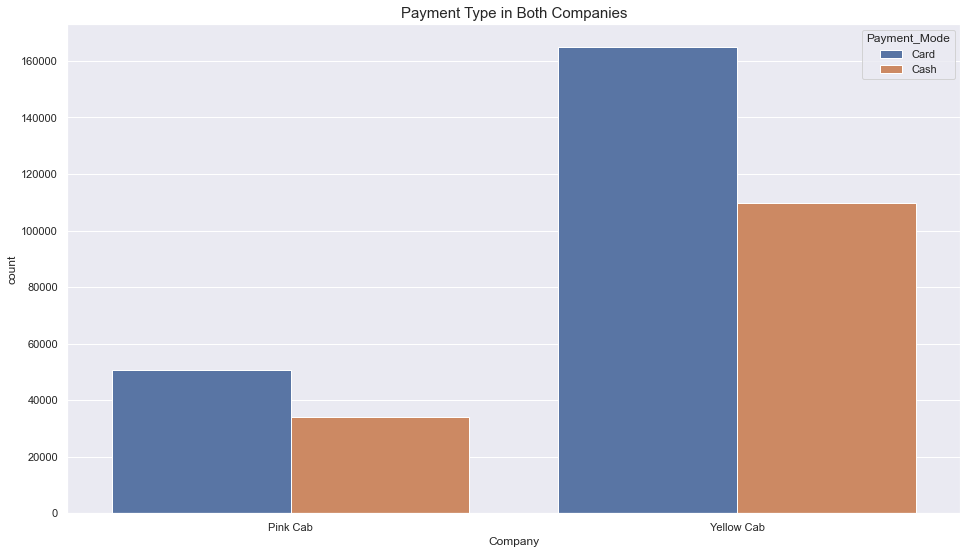

In [105]:
plt.figure(figsize = (16, 9))
axes = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Type in Both Companies', fontsize=15)
plt.show()

In [73]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


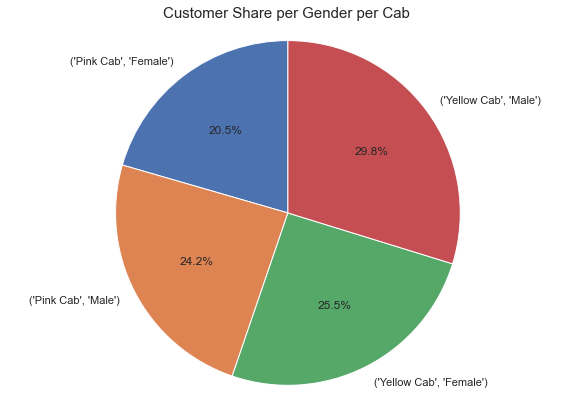

In [149]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Customer Share per Gender per Cab', fontsize = 15)
plt.show()

In [82]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day

4. Travel Frequency by Month

In [83]:
monthtr=df.groupby(['Month'])['Transaction ID'].count()

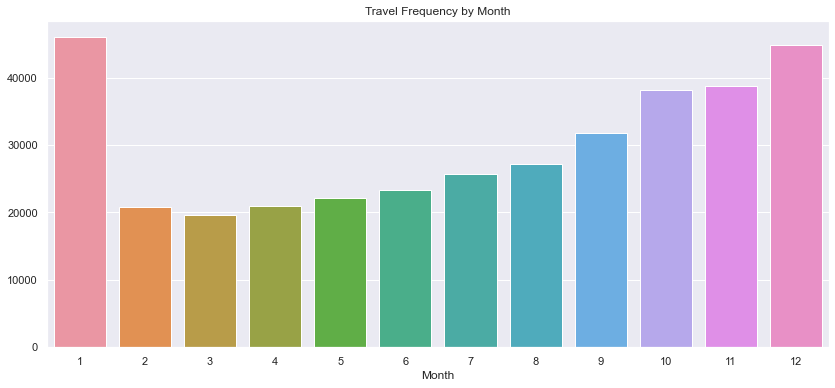

In [104]:
#Monthwise Analysis
plt.figure(figsize=(14,6))
sns.barplot(x=monthtr.index,y=monthtr.values)
plt.title('Travel Frequency by Month')
plt.show()

5. Customers - Cab

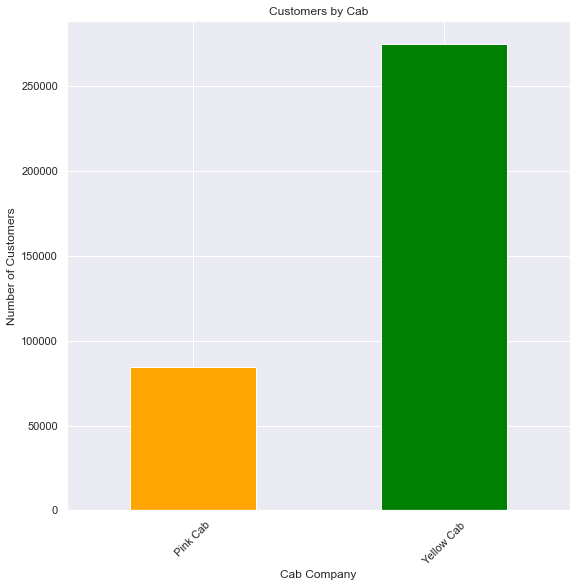

In [78]:
df['Company'].value_counts(ascending=True).plot(kind='bar', color=['orange', 'green'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

6. Pink Cab Profit - Yellow Cab Profit

In [87]:
df['Year'].value_counts()

2017    126376
2018    124916
2016     93661
2019     14439
Name: Year, dtype: int64

In [88]:
pinkprofit=df[df.Company=='Pink Cab'].groupby(df['Year']).Profit.mean()
yellowprofit=df[df.Company=='Yellow Cab'].groupby('Year').Profit.mean()
print("Pink Cab Profit:->\n", pinkprofit)
print("\nYellow Cab Profit:->\n", yellowprofit)

Pink Cab Profit:->
 Year
2016   63.864
2017   66.459
2018   56.539
2019   74.704
Name: Profit, dtype: float64

Yellow Cab Profit:->
 Year
2016   171.380
2017   169.083
2018   145.838
2019   134.708
Name: Profit, dtype: float64


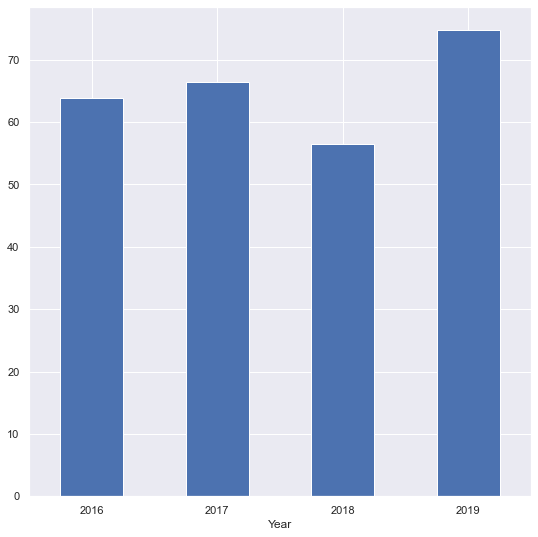

In [89]:
#Average profit yearly for pink cab
ax = pinkprofit.plot.bar(rot=0)

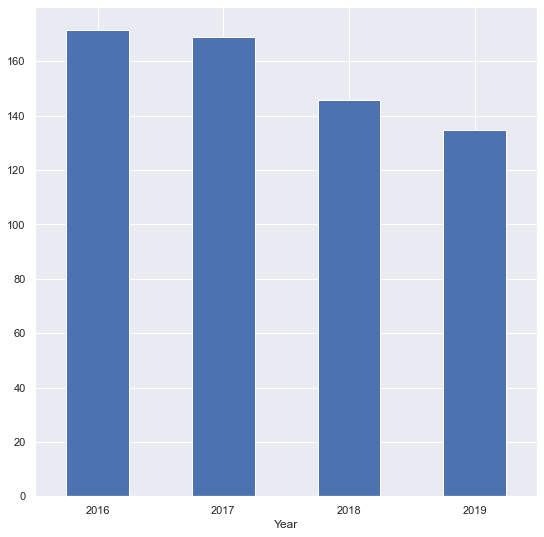

In [90]:
#Average profit yearly for yellow cab
ax = yellowprofit.plot.bar(rot=0)

In [91]:
yeartr=df.groupby(['Year'])['Transaction ID'].count()
yeartr

Year
2016     93661
2017    126376
2018    124916
2019     14439
Name: Transaction ID, dtype: int64

7. Travel Frequency by year

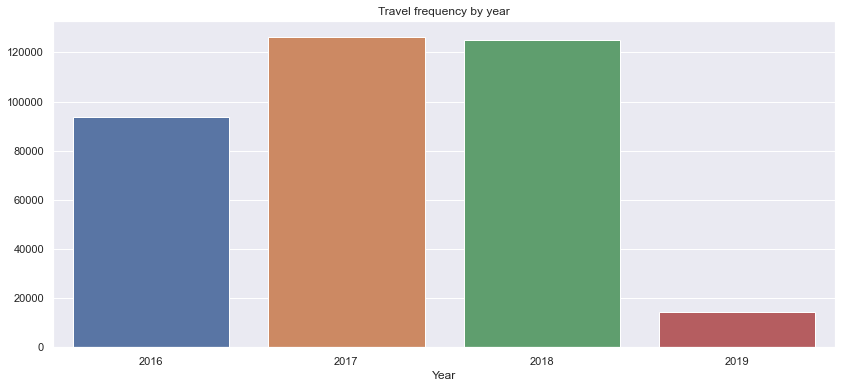

In [93]:
plt.figure(figsize=(14,6))
sns.barplot(x=yeartr.index,y=yeartr.values)
plt.title('Travel frequency by year')
plt.show()

8. Company Income and Analysis of city

In [94]:
df.groupby('Company')['Income (USD/Month)'].mean()

Company
Pink Cab     15059.047
Yellow Cab   15045.670
Name: Income (USD/Month), dtype: float64

In [95]:
city = df.groupby('City')['Transaction ID'].count().sort_values(ascending=False)
city

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction ID, dtype: int64

9. Gender Analysis

In [96]:
pink_gender=df[df.Company=='Pink Cab'].groupby(['Gender'])['Transaction ID'].count()
yellow_gender=df[df.Company=='Yellow Cab'].groupby(['Gender'])['Transaction ID'].count()

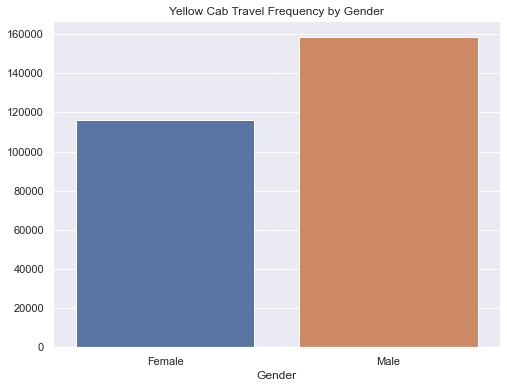

In [107]:
plt.figure(figsize=(8,6))
sns.barplot(x=yellow_gender.index, y=yellow_gender.values)
plt.title('Yellow Cab Travel Frequency by Gender')
plt.show()

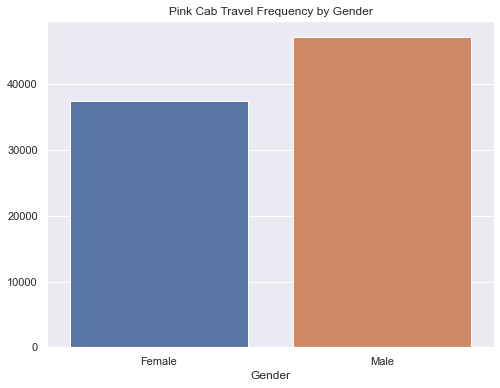

In [108]:
plt.figure(figsize=(8,6))
sns.barplot(x=pink_gender.index, y=pink_gender.values)
plt.title('Pink Cab Travel Frequency by Gender')
plt.show()

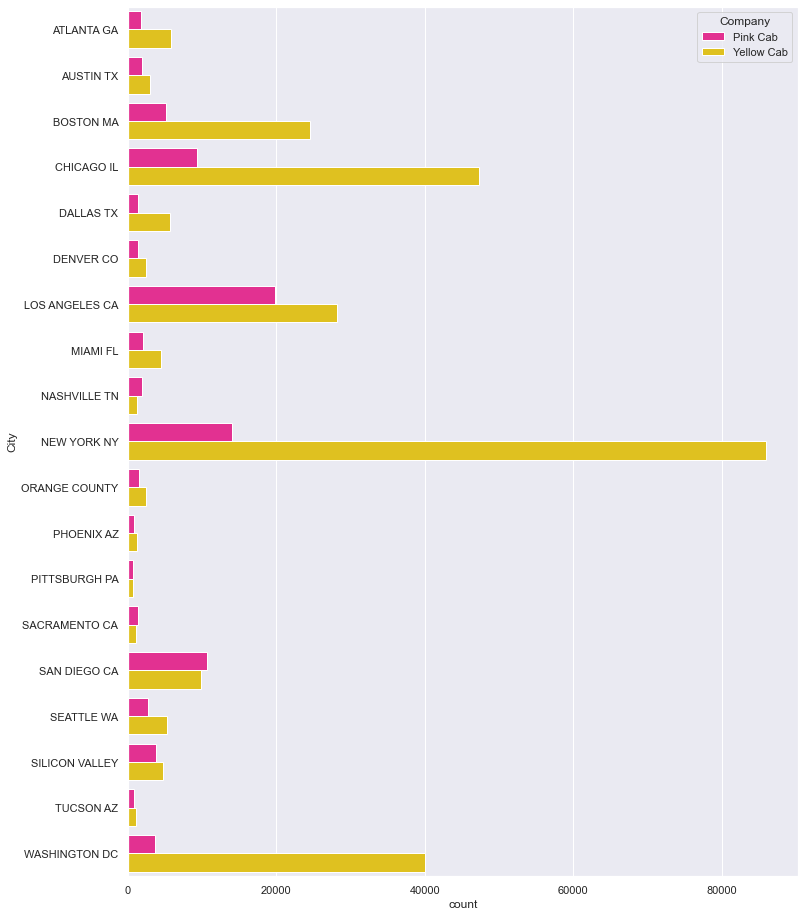

In [135]:
figure, axes = plt.subplots(figsize=(12, 16))
palette = {"Pink Cab": "deeppink", "Yellow Cab": "gold"}
axes = sns.countplot(y='City', hue='Company', data=df, palette=palette)
plt.show()

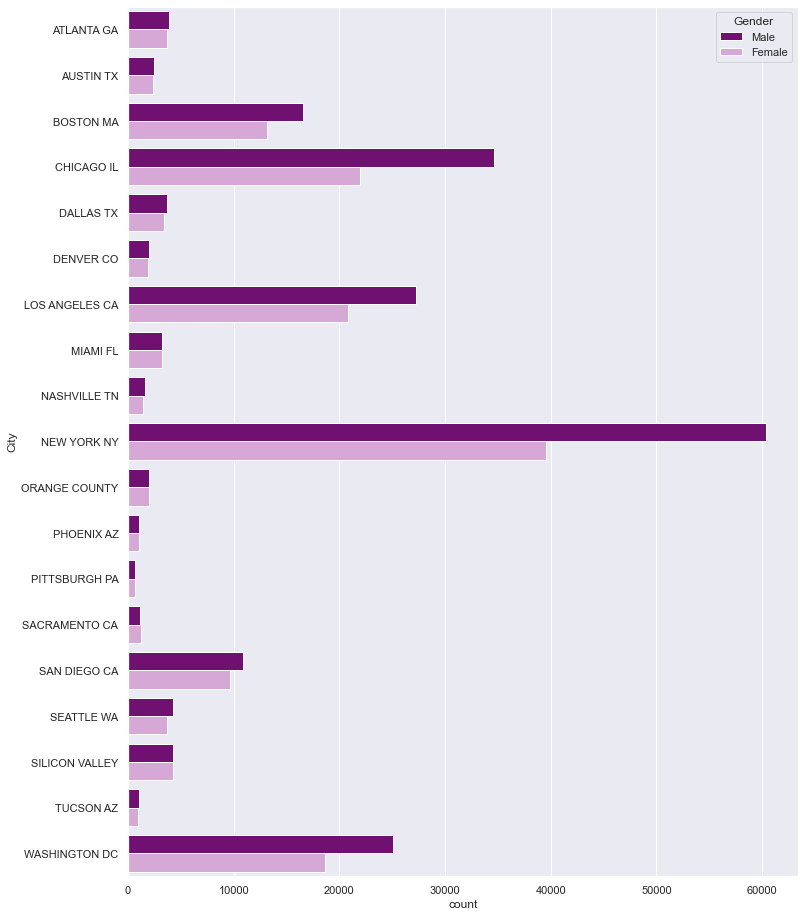

In [120]:
figure, axes = plt.subplots(figsize=(12, 16))
color_palette = {"plum","purple"}
axes = sns.countplot(y='City', hue='Gender', data=df, palette=color_palette)
plt.show()

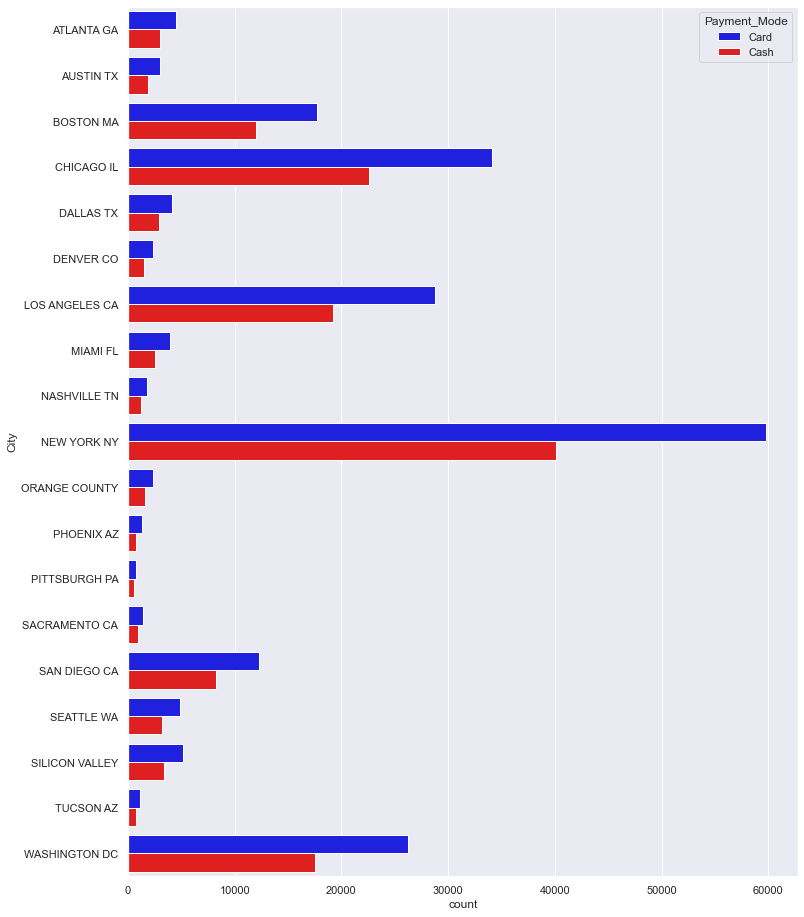

In [118]:
figure, axes = plt.subplots(figsize=(12, 16))
color_palette = {"red","blue"}
axes = sns.countplot(y='City', hue='Payment_Mode', data=df, palette=color_palette)
plt.show()

The Exploratory Data Analysis (EDA) conducted on the data of Pink Cab and Yellow Cab companies reveals various insights. The master dataframe does not contain any missing values. Our analysis indicates that Yellow Cab generates more profit than Pink Cab and is more popular among users. However, the profit of Yellow Cab has been decreasing over the years, while that of Pink Cab has been increasing.

Additionally, we observed that the months of January and December have the highest number of travels, which is expected since they are typically holiday months. In summary, based on our findings, investing in Yellow Cab would be a more favorable option.

Hypothesis

Hypothesis 1: Is there any difference in profit according to Gender

    H0 : There is no difference according to Gender in both cab companies.
    H1 : There is difference according to Gender in both cab companies.

In [142]:
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('PINK CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Pink Cab')

PINK CAB 

P value is  0.11515305900425798 So,
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [143]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('Yellow CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Yelllow Cab')

Yellow CAB 

P value is  6.060473042494144e-25 So,
We accept alternative hypothesis (H1) that there is a difference according to gender for Yellow Cab


Hypothesis 2: Is there any difference in Profit regarding Age

    H0 : There is no difference regarding Age in both cab companies.
    H1 : There is difference regarding Age in both cab companies.

In [144]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('PINK CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Pink Cab')

PINK CAB 

P value is  0.4816748536155635 So,
We accept null hypothesis (H0) that there is no difference according to gender for Pink Cab


In [145]:
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('Yellow CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Yelllow Cab')

Yellow CAB 

P value is  6.328485471267631e-05 So,
We accept alternative hypothesis (H1) that there is a difference according to gender for Yellow Cab


Hypothesis 3: Is there any difference in Profit concerning Payment mode

    H0 : There is no difference concerning Payment_Mode in both cab companies.
    H1 : There is difference concerning Payment_Mode in both cab companies.

In [146]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('PINK CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Pink Cab')

PINK CAB 

P value is  0.7900465828793288 So,
We accept null hypothesis (H0) that there is no difference according to gender for Pink Cab


In [147]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)
print('Yellow CAB',"\n")
print('P value is ', p_value, 'So,')

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference according to gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference according to gender for Yelllow Cab')

Yellow CAB 

P value is  0.2933060638298729 So,
We accept null hypothesis (H0) that there is no difference according to gender for Yelllow Cab
